# Lab 8 - Mean Square Error and validation

We will continue looking at the insurance data set from Lab 7.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.model_selection import KFold

%matplotlib inline

Load the CSV file into a dataframe and display it.

In [4]:
insurance = pd.read_csv("insurance.txt")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## More about dummy variables

Change the `sex`, `smoker`, and `region` columns to dummy variables.

In [5]:
insurance_new = pd.get_dummies(insurance, columns = ["sex", "smoker", "region"], drop_first = True)
insurance_new.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


First remember the scatter plot showing the relation being age, smoker and insurance charges:

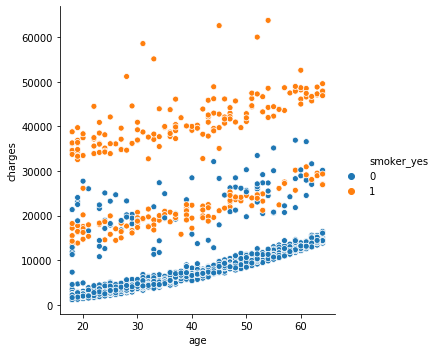

In [6]:
sns.relplot(x = "age", y = "charges", hue = "smoker_yes", data = insurance_new)

Let's look at a linear model with `age` and `smoker_yes` as the independent variables.

In [20]:
lm = smf.ols("charges ~ age + smoker_yes", insurance_new).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     1728.
Date:                Tue, 24 Sep 2019   Prob (F-statistic):               0.00
Time:                        17:11:14   Log-Likelihood:                -13623.
No. Observations:                1338   AIC:                         2.725e+04
Df Residuals:                    1335   BIC:                         2.727e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2391.6264    528.302     -4.527      0.000   -3428.019   -1355.234
age          274.8712     12.455     22.069      0.000     250.437     299.305
smoker_yes  2.386e+04    433.488     55.031      0.000     2.3e+04    2.47e+04
==============================================================================
Omnibus:                      265.239   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              636.675
Skew:                           1.074   Prob(JB):                    5.59e-139
Kurtosis:                       5.609   Cond. No.                         130.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What's the linear model if $X_1$ is age and $X_2$ is smoker_yes?

$$y = -2391.6264 + 274.8712x_1 + 23860x_2$$

Consider all the non-smokers. For these people, what is $x_2$?  So what is the linear model for only non-smokers?

__For these people, $x_2$ is 0__

__Therefore the linear model for only non-smokers is $$y = -2391.6264 + 274.8712x_1$$__


Let's visualize this line.

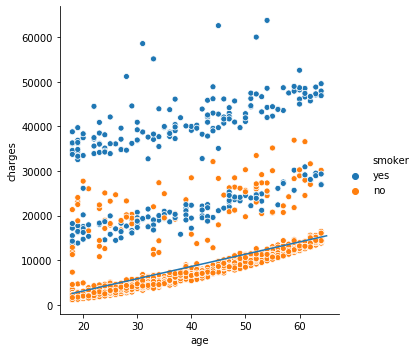

In [21]:
sns.relplot(x = "age", y = "charges", hue = "smoker", data = insurance)
x = np.linspace(18,65,100)
y = -2391.6264 + 274.8712*x
plt.plot(x,y)

Now consider only the smokers.  What is the value of $x_2$?  What is the linear model for the smokers?  

__For smokers the value of $x_2$ is 1. Therefore the linear model is:__

$$y = -2391.6264 + 274.8712x_1 + 23860x_2 = 21468.3736 + 274.8712x_1$$

Again, let's visualize the line for the smoker linear model:

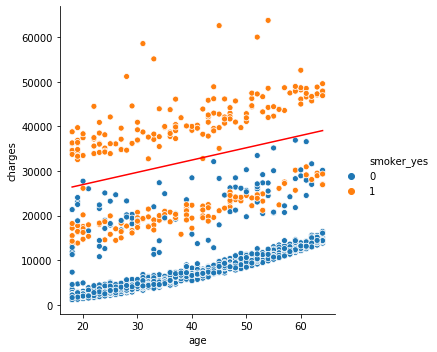

In [47]:
sns.relplot(x = "age", y = "charges", hue = "smoker_yes", data = insurance_new)
x = np.linspace(insurance["age"].min(), insurance["age"].max(), 274)
x2 = np.linspace(insurance["age"].min(), insurance["age"].max(), 1064)
y = 21468.3736 + 274.8712 * x
plt.plot(x,y, color = "red")

Are these the same two linear models we would get if we filtered our data set into smokers and non-smokers and separately computed the linear model for each?

Try it below.

In [39]:
smoker_filter = insurance_new["smoker_yes"] == 1
smokers = insurance_new[smoker_filter] 

lm2 = smf.ols("charges ~ age", smokers).fit()
y1 = lm2.fittedvalues
lm2.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     42.67
Date:                Tue, 24 Sep 2019   Prob (F-statistic):           3.18e-10
Time:                        17:28:49   Log-Likelihood:                -2931.2
No. Observations:                 274   AIC:                             5866.
Df Residuals:                     272   BIC:                             5874.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.029e+04   1913.400     10.606      0.000    1.65e+04    2.41e+04
age          305.2376     46.731      6.532      0.000     213.238     397.237
==============================================================================
Omnibus:                      187.247   Durbin-Watson:                   1.876
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.070
Skew:                           0.103   Prob(JB):                     0.000119
Kurtosis:                       1.759   Cond. No.                         121.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
non_smoker_filter = insurance_new["smoker_yes"] == 0
non_smokers = insurance_new[non_smoker_filter] 

lm3 = smf.ols("charges ~ age", non_smokers).fit()
y2 = lm3.fittedvalues
lm3.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     691.4
Date:                Tue, 24 Sep 2019   Prob (F-statistic):          9.17e-118
Time:                        17:28:37   Log-Likelihood:                -10498.
No. Observations:                1064   AIC:                         2.100e+04
Df Residuals:                    1062   BIC:                         2.101e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2091.4206    425.102     -4.920      0.000   -2925.556   -1257.285
age          267.2489     10.164     26.294      0.000     247.306     287.192
==============================================================================
Omnibus:                      701.402   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5516.908
Skew:                           3.143   Prob(JB):                         0.00
Kurtosis:                      12.215   Cond. No.                         124.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

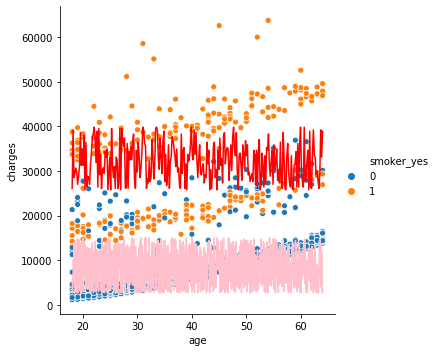

In [48]:
sns.relplot(x = "age", y = "charges", hue = "smoker_yes", data = insurance_new)
plt.plot(x, lm2.fittedvalues, color = "red")
plt.plot(x2, lm3.fittedvalues, color = "pink")

## Mean Squared Error

The error is the difference between the actual $y_i$ value and what was predicted $\hat{y_i}$.  The *mean squared error (MSE)* is the mean of the squares of the error terms:

$$MSE =\frac{\sum_i (y_i - \hat{y_i})^2}{n}$$

While error in linear regression is often measured by the residual sum of squares (RSS), the mean square error is similar, but used to measure error for other methods of prediction.

Let's compute the MSE for the above linear model.  How can you get the error terms?

In [54]:
error = (insurance["charges"] - lm.fittedvalues)

Now square the error terms:

In [55]:
error_sq = error**2

Now take the mean of the squared error terms:

In [60]:
mse = (error_sq).mean()
mse

40826693.69231889

Altogether:

In [61]:
((insurance_new["charges"] - lm.fittedvalues)**2).mean()

40826693.69231889

Let's compare to the mean squared error with all columns as independent variables:

In [83]:
lm4 = smf.ols("charges ~ age + bmi + children + sex_male + smoker_yes + region_northwest + region_southeast + region_southwest", insurance_new).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Tue, 24 Sep 2019   Prob (F-statistic):               0.00
Time:                        17:50:58   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.194e+04    987.819    -12.086      0.000   -1.39e+04      -1e+04
age                256.8564     11.899     21.587      0.000     233.514     280.199
bmi                339.1935     28.599     11.860      0.000     283.088     395.298
children           475.5005    137.804      3.451      0.001     205.163     745.838
sex_male          -131.3144    332.945     -0.394      0.693    -784.470     521.842
smoker_yes        2.385e+04    413.153     57.723      0.000     2.3e+04    2.47e+04
region_northwest  -352.9639    476.276     -0.741      0.459   -1287.298     581.370
region_southeast -1035.0220    478.692     -2.162      0.031   -1974.097     -95.947
region_southwest  -960.0510    477.933     -2.009      0.045   -1897.636     -22.466
==============================================================================
Omnibus:                      300.366   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              718.887
Skew:                           1.211   Prob(JB):                    7.86e-157
Kurtosis:                       5.651   Cond. No.                         311.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
mse = ((insurance_new["charges"] - lm4.fittedvalues)**2).mean()
mse

36501893.00741547

Look at the p-values to determine which columns to remove from model.  Remove columns one at a time, as the p-values of the other columns will change.

In [87]:
lm5 = smf.ols("charges ~ age + bmi + children + smoker_yes + region_northwest + region_southeast + region_southwest", insurance_new).fit()
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     572.7
Date:                Tue, 24 Sep 2019   Prob (F-statistic):               0.00
Time:                        17:54:09   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1330   BIC:                         2.715e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.199e+04    978.762    -12.250      0.000   -1.39e+04   -1.01e+04
age                256.9736     11.891     21.610      0.000     233.646     280.301
bmi                338.6646     28.559     11.858      0.000     282.639     394.690
children           474.5665    137.740      3.445      0.001     204.355     744.778
smoker_yes        2.384e+04    411.856     57.875      0.000     2.3e+04    2.46e+04
region_northwest  -352.1821    476.120     -0.740      0.460   -1286.211     581.847
region_southeast -1034.3601    478.537     -2.162      0.031   -1973.130     -95.590
region_southwest  -959.3747    477.778     -2.008      0.045   -1896.656     -22.094
==============================================================================
Omnibus:                      300.735   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              720.516
Skew:                           1.212   Prob(JB):                    3.48e-157
Kurtosis:                       5.654   Cond. No.                         309.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
lm6 = smf.ols("charges ~ age + bmi + children + smoker_yes + region_southeast + region_southwest", insurance_new).fit()
lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     668.3
Date:                Tue, 24 Sep 2019   Prob (F-statistic):               0.00
Time:                        17:54:49   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1331   BIC:                         2.715e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.217e+04    949.538    -12.812      0.000    -1.4e+04   -1.03e+04
age                257.0064     11.889     21.617      0.000     233.683     280.330
bmi                338.6413     28.554     11.860      0.000     282.625     394.657
children           471.5441    137.656      3.426      0.001     201.498     741.590
smoker_yes        2.384e+04    411.659     57.921      0.000     2.3e+04    2.47e+04
region_southeast  -858.4696    415.206     -2.068      0.039   -1672.998     -43.941
region_southwest  -782.7452    413.756     -1.892      0.059   -1594.430      28.940
==============================================================================
Omnibus:                      300.125   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              716.587
Skew:                           1.211   Prob(JB):                    2.48e-156
Kurtosis:                       5.643   Cond. No.                         295.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
lm7 = smf.ols("charges ~ age + bmi + children + smoker_yes + region_southeast", insurance_new).fit()
lm7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     799.7
Date:                Tue, 24 Sep 2019   Prob (F-statistic):               0.00
Time:                        17:55:33   Log-Likelihood:                -13550.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1332   BIC:                         2.714e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.228e+04    948.666    -12.940      0.000   -1.41e+04   -1.04e+04
age                257.1365     11.901     21.607      0.000     233.791     280.482
bmi                333.4448     28.449     11.721      0.000     277.635     389.255
children           468.0668    137.777      3.397      0.001     197.783     738.350
smoker_yes        2.385e+04    412.023     57.895      0.000     2.3e+04    2.47e+04
region_southeast  -578.8620    388.384     -1.490      0.136   -1340.774     183.050
==============================================================================
Omnibus:                      302.906   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              726.891
Skew:                           1.220   Prob(JB):                    1.44e-158
Kurtosis:                       5.662   Cond. No.                         294.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
lm8 = smf.ols("charges ~ age + bmi + children + smoker_yes", insurance_new).fit()
lm8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     998.1
Date:                Tue, 24 Sep 2019   Prob (F-statistic):               0.00
Time:                        17:55:55   Log-Likelihood:                -13551.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1333   BIC:                         2.714e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -1.21e+04    941.984    -12.848      0.000    -1.4e+04   -1.03e+04
age          257.8495     11.896     21.675      0.000     234.512     281.187
bmi          321.8514     27.378     11.756      0.000     268.143     375.559
children     473.5023    137.792      3.436      0.001     203.190     743.814
smoker_yes  2.381e+04    411.220     57.904      0.000     2.3e+04    2.46e+04
==============================================================================
Omnibus:                      301.480   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              722.157
Skew:                           1.215   Prob(JB):                    1.53e-157
Kurtosis:                       5.654   Cond. No.                         292.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Compute the mean squared error:

In [92]:
mse = ((insurance["charges"] - lm8.fittedvalues)**2).mean()
mse

36680455.991493754

## Training and test sets

Humans learn some things by training (ex. doing homework or practicing a sport or musical instrument), and can check if they know them by testing (ex. test in a university class, a game for a sport, or a performance for a musical instrument).  When you take a test in a math class, say, the questions are different from the ones you practiced on for homework, to ensure you understand the concepts and didn't simply memorize the answers.  We want to test the computer's ability to make a prediction in a similar way.

Therefore, we want to divide our data into *training data* and *test data*.  We will "learn" the linear model on the training data, and then make prediction on the new, previously-unseen test data.

We can use the sci-kit learn package to split up our data.  Notice we are specifying which columns to use as the input data.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(insurance_new[["age","smoker_yes"]], insurance["charges"], test_size=0.2)

Display X_train, X_test, y_train, and y_test below.  Are they what you expect?

In [8]:
X_train

,age,smoker_yes
1130,39,0
726,41,0
746,34,0
1189,23,0
805,45,0
846,51,0
832,28,0
466,60,0
530,57,1
1256,51,0


In [9]:
X_test

,age,smoker_yes
175,63,1
609,30,1
682,39,1
328,64,1
1184,23,1
643,23,0
59,34,0
796,30,0
87,56,0
869,25,0


In [13]:
y_train

1130     8582.30230
726      6664.68595
746     11737.84884
1189    13126.67745
805      7731.85785
846      9872.70100
832      4719.73655
466     13224.69300
530     48675.51770
1256    11436.73815
856     40974.16490
6        8240.58960
704      8930.93455
974      2322.62180
847      2438.05520
417     18608.26200
815      1877.92940
141      3490.54910
324      2866.09100
670      4837.58230
73      11946.62590
1099     3227.12110
853     11729.67950
673      6185.32080
432      5969.72300
791      1252.40700
971      4992.37640
515     11362.75500
842     36021.01120
697     40273.64550
           ...     
1132    20709.02034
877      6653.78860
1038     2250.83520
65       1743.21400
1237    12224.35085
148     10959.69470
1158     2459.72010
762     19040.87600
1284    47403.88000
232      1727.78500
425      9788.86590
1012    36580.28216
316      8835.26495
272      7265.70250
360     10043.24900
1135    11085.58680
1088     9748.91060
1010     8269.04400
181      1631.82120


In [14]:
y_test

175     48824.45000
609     39241.44200
682     40103.89000
328     47928.03000
1184    18328.23810
643      4466.62140
59       5989.52365
796      4266.16580
87      11073.17600
869      4391.65200
392      8964.06055
963      9500.57305
105     17560.37975
994     16420.49455
652      8280.62270
504      5974.38470
30      35585.57600
1232    12479.70895
497      8027.96800
1085    19023.26000
330     48517.56315
310      8444.47400
659     14394.39815
1136     7623.51800
745      9910.35985
314     34838.87300
595      8823.98575
1019    26018.95052
130     12815.44495
1224     6858.47960
           ...     
1228    10594.22570
202     13012.20865
578      9724.53000
1108     2904.08800
23      37701.87680
35       1625.43375
591      8428.06930
445      7345.08400
581      1639.56310
1120    34166.27300
355     24603.04837
824     12523.60480
517      8413.46305
1176    23887.66270
522      9866.30485
810      9414.92000
25      14001.13380
833     11743.93410
373     36085.21900


We can also make a linear model with Sci-kit learn:

In [15]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

Compute the mean squared error:

In [18]:
mse = ((y_test - predictions)**2).mean()
mse

45360386.26229534

Get R-squared:

In [19]:
model.score(X_test, y_test)

0.7011788935334674